In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#Load & Inspect Data
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Customers.csv")
df.info()
df.describe(include='all')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          101 non-null    object 
 1   Age                 101 non-null    object 
 2   Gender              99 non-null     object 
 3   Income              98 non-null     float64
 4   Spending Score      98 non-null     object 
 5   Purchase Frequency  97 non-null     float64
 6   Tenure              99 non-null     float64
 7   Location/City       100 non-null    object 
 8   Membership Level    101 non-null    object 
 9   Last Purchase Date  97 non-null     object 
 10  Preferred Category  101 non-null    object 
dtypes: float64(3), object(8)
memory usage: 8.8+ KB


,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28,Female,52000.0,78,12.0,3.0,New York,Gold,2025-11-20,Electronics
1,C002,35,Male,68000.0,65,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion
2,C003,42,Female,75000.0,82,15.0,7.0,Chicago,Platinum,11/30/2025,Home Decor
3,C004,23,Male,NaN,55,6.0,1.0,Houston,Bronze,2025-09-27,Sports
4,C005,31,Female,59000.0,NaN,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty


<Axes: >

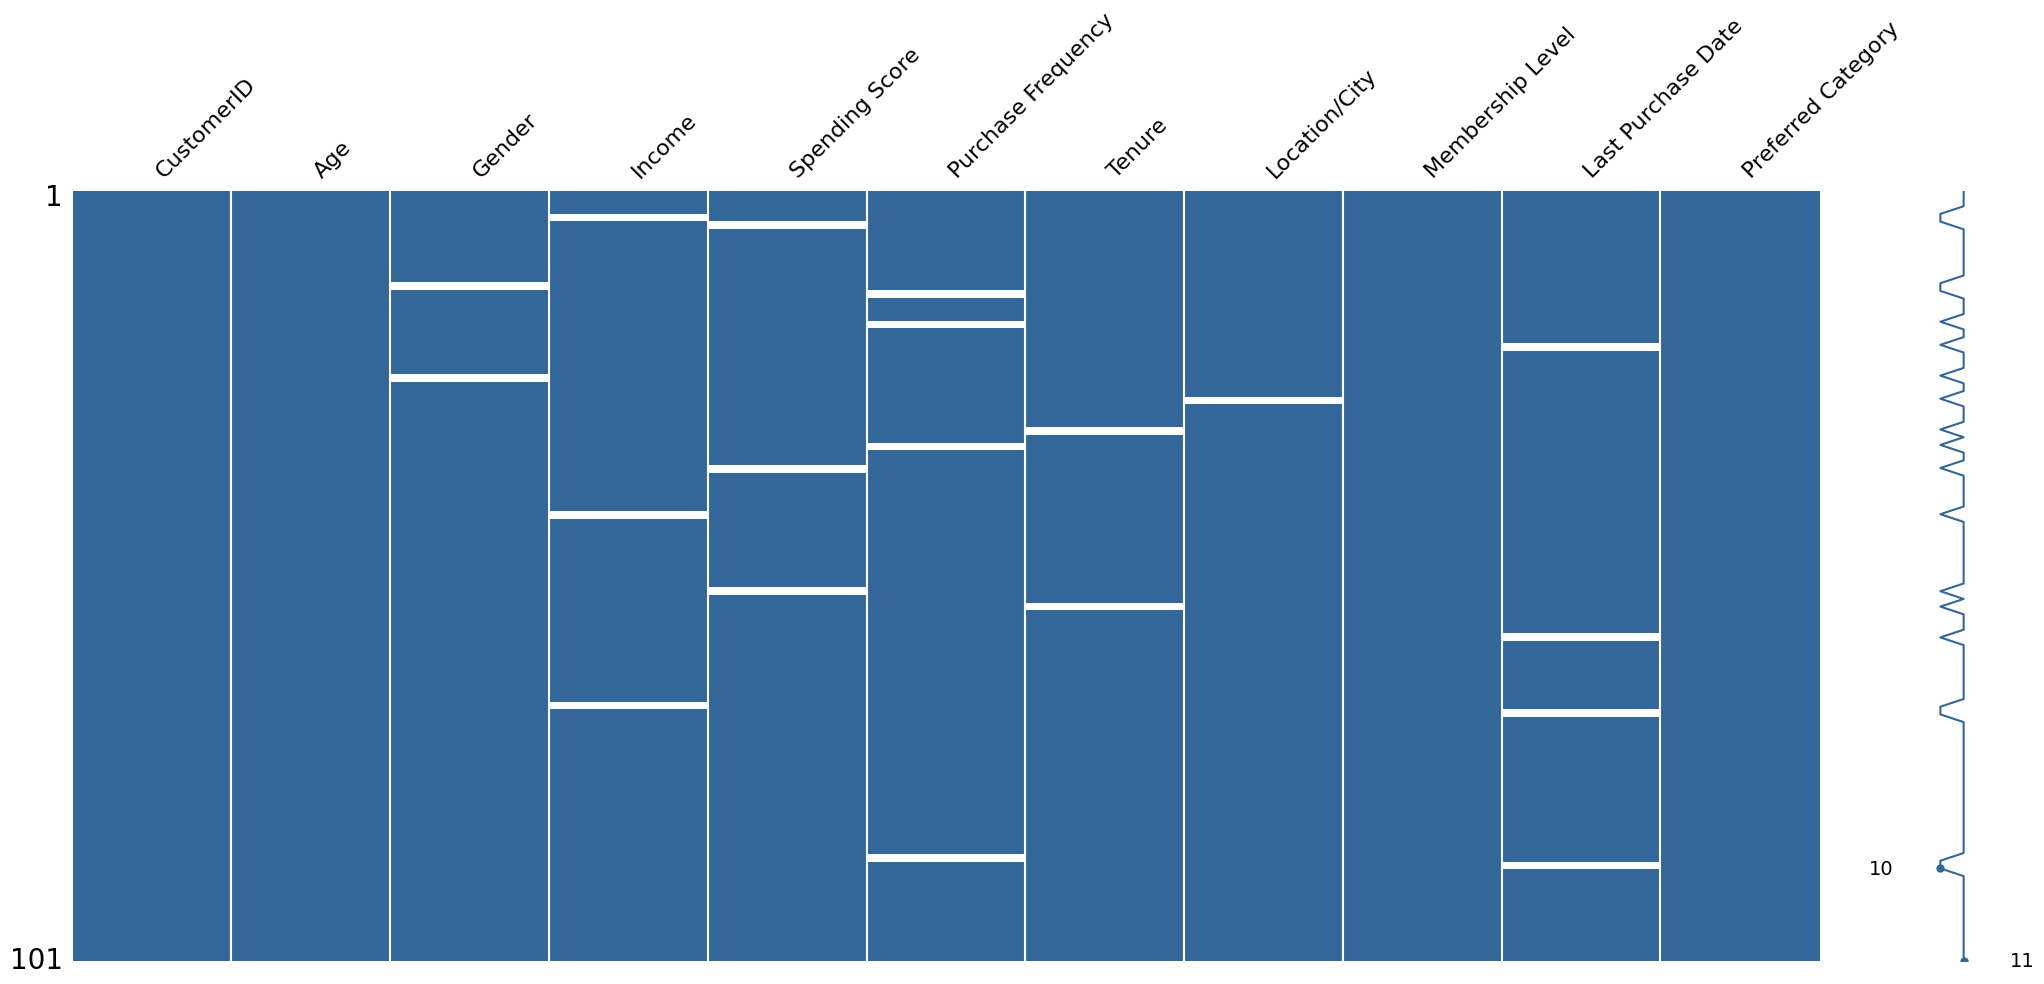

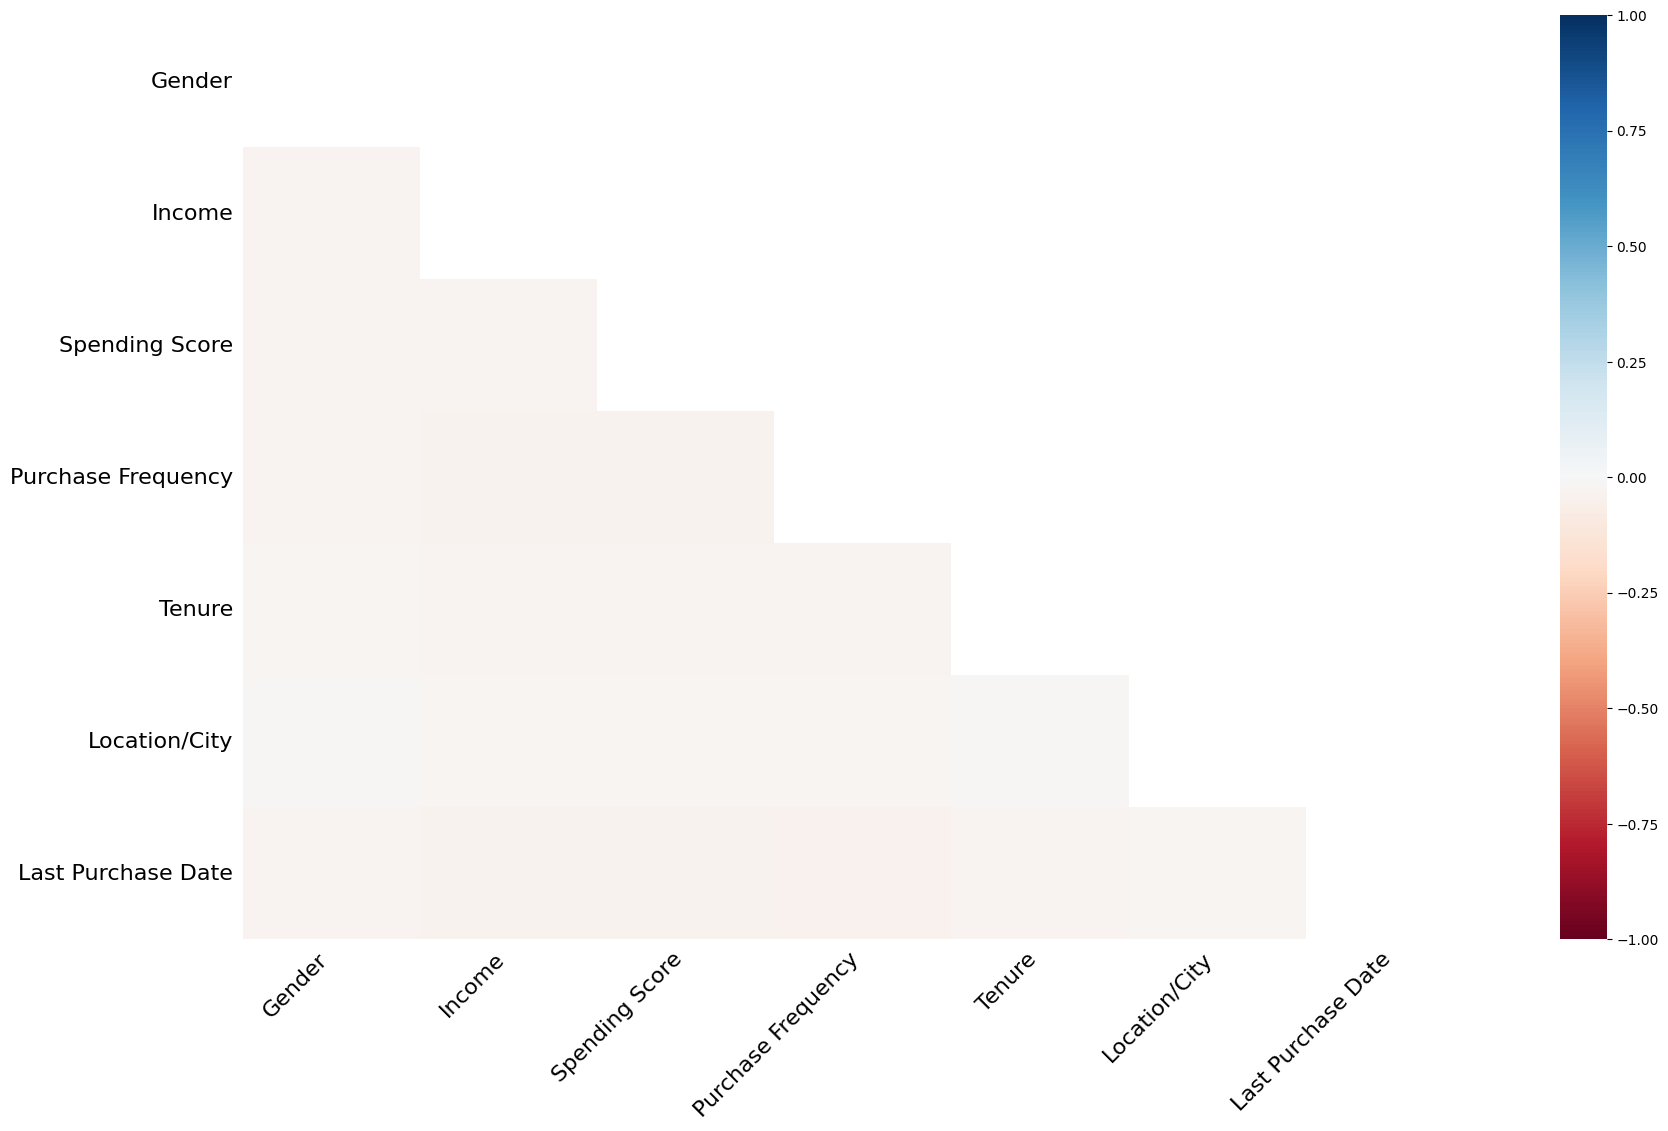

In [70]:
#Handle Missing Data (Advanced Techniques)
#✓ A. Find Missing Data Pattern
import missingno as msno
msno.matrix(df, sparkline=True, color =(0.2,0.4,0.6))
msno.heatmap(df)


✓ B. Domain-Based Imputation
•	Age → median by Gender/Location
•	Income → regression-based imputation
•	Category Missing → Unknown
•	Last Purchase Date → assumed as churn if missing


In [71]:
num_cols = ['Age', 'Income', 'Spending Score', 'Purchase Frequency', 'Tenure']

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
print(df['Spending Score'].dtype)

float64


In [72]:
df_raw = df.copy()

In [73]:
#Example: Regression Imputer

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df[['Age','Income','Spending Score']] = knn_imputer.fit_transform(df[['Age','Income','Spending Score']])
#✓ C. Categorical Imputation

df['Preferred Category'] = df['Preferred Category'].fillna("Unknown")


In [74]:
changes = df_raw.compare(df)
changes


Age            Income               Spending Score           
   self      other   self         other           self      other
3   NaN        NaN    NaN  40333.333333            NaN        NaN
4   NaN        NaN    NaN           NaN            NaN  65.333333
36  NaN        NaN    NaN           NaN            NaN  72.000000
42  NaN        NaN    NaN  94666.666667            NaN        NaN
44  NaN  35.666667    NaN           NaN            NaN        NaN
52  NaN        NaN    NaN           NaN            NaN  81.666667
67  NaN        NaN    NaN  46000.000000            NaN        NaN
77  NaN        NaN    NaN           NaN            NaN  85.000000

In [75]:
#Remove Duplicates
df = df.drop_duplicates(subset=['CustomerID'])
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,Gold,2025-11-20,Electronics
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,Platinum,11/30/2025,Home Decor
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,Bronze,2025-09-27,Sports
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty
...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,Platinum,2025-11-29,Travel
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,Gold,2025-11-13,Books
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,Gold,2025-10-19,Home Decor
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,Gold,2025-11-16,Electronics


In [76]:
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,Gold,2025-11-20,Electronics
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,Platinum,11/30/2025,Home Decor
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,Bronze,2025-09-27,Sports
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty
...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,Platinum,2025-11-29,Travel
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,Gold,2025-11-13,Books
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,Gold,2025-10-19,Home Decor
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,Gold,2025-11-16,Electronics


In [77]:

#Fix Data Types
df['CustomerID'] = df['CustomerID'].astype(str)
#df['JoinDate'] = pd.to_datetime(df['JoinDate'])
#df['Last Purchase Date'] = pd.to_datetime(df['Last Purchase Date'])
df['Last Purchase Date'] = pd.to_datetime(df['Last Purchase Date'], format='mixed')
df


,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,Gold,2025-11-20,Electronics
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,Platinum,2025-11-30,Home Decor
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,Bronze,2025-09-27,Sports
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty
...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,Platinum,2025-11-29,Travel
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,Gold,2025-11-13,Books
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,Gold,2025-10-19,Home Decor
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,Gold,2025-11-16,Electronics


In [78]:
#Handling Outliers (Advanced)
#method 1
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
IQR
df = df[(df['Income'] > Q1 - 1.5*IQR) & (df['Income'] < Q3 + 1.5*IQR)]
df
#Method 2: Z-Score
from scipy import stats
df = df[(np.abs(stats.zscore(df[['Income','Spending Score']])) < 3).all(axis=1)]
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,Gold,2025-11-20,Electronics
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,Platinum,2025-11-30,Home Decor
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,Bronze,2025-09-27,Sports
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty
...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,Platinum,2025-11-29,Travel
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,Gold,2025-11-13,Books
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,Gold,2025-10-19,Home Decor
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,Gold,2025-11-16,Electronics


In [62]:
#Advanced String Cleaning
#Standardize formatting
df['Location/City'] = df['Location/City'].str.strip().str.title()
df['Gender'] = df['Gender'].str.capitalize()


In [64]:
#Regex-based extraction
#df['PostalCode'] = df['Address'].str.extract(r'(\d{6})')


In [ ]:
df.info()

In [ ]:
df['Location/City'].unique()

In [ ]:
df['Preferred Category'].unique()


In [79]:
df['Gender'].unique()

array(['Female', 'Male', 'Non-Binary', 'male', nan], dtype=object)

In [66]:
#Encoding Categorical Data
#One-Hot for Nominal
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,CustomerID,Age,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category,Gender_Male,Gender_Non-binary
0,C001,28.0,52000.000000,78.000000,12.0,3.0,New York,Gold,2025-11-20,Electronics,False,False
1,C002,35.0,68000.000000,65.000000,8.0,5.0,Los Angeles,Silver,2025-10-15,Fashion,True,False
2,C003,42.0,75000.000000,82.000000,15.0,7.0,Chicago,Platinum,2025-11-30,Home Decor,False,False
3,C004,23.0,40333.333333,55.000000,6.0,1.0,Houston,Bronze,2025-09-27,Sports,True,False
4,C005,31.0,59000.000000,65.333333,10.0,4.0,Phoenix,Gold,2025-12-01,Beauty,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,93000.000000,90.000000,17.0,10.0,Little Rock,Platinum,2025-11-29,Travel,False,False
97,C097,28.0,56000.000000,74.000000,11.0,3.0,Anaheim,Gold,2025-11-13,Books,True,False
98,C098,39.0,73000.000000,76.000000,12.0,6.0,Augusta,Gold,2025-10-19,Home Decor,False,False
99,C099,47.0,87000.000000,85.000000,15.0,9.0,Grand Prairie,Gold,2025-11-16,Electronics,True,False


In [80]:
#Label Encoding for Ordinal [membership level withh get converted in numbers]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Membership Level'] = le.fit_transform(df['Membership Level'])
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,3,2025-11-20,Electronics
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,6,2025-10-15,Fashion
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,5,2025-11-30,Home Decor
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,2,2025-09-27,Sports
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,3,2025-12-01,Beauty
...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,5,2025-11-29,Travel
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,3,2025-11-13,Books
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,3,2025-10-19,Home Decor
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,3,2025-11-16,Electronics


In [82]:
#FEATURE ENGINEERING FOR SEGMENTATION
#RFM Features (Used in E-Commerce)
#RFM = Recency, Frequency, Monetary
#1.Recency (days since last purchase)
from datetime import datetime

today = df['Last Purchase Date'].max()
df['Recency'] = (today - df['Last Purchase Date']).dt.days
#2. Frequency
df['Frequency'] = df['Purchase Frequency']
#. Monetary Value
#df['Monetary'] = df['AverageOrderValue'] * df['Frequency']


In [83]:
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category,Recency,Frequency
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,3,2025-11-20,Electronics,11.0,12.0
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,6,2025-10-15,Fashion,47.0,8.0
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,5,2025-11-30,Home Decor,1.0,15.0
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,2,2025-09-27,Sports,65.0,6.0
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,3,2025-12-01,Beauty,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,5,2025-11-29,Travel,2.0,17.0
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,3,2025-11-13,Books,18.0,11.0
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,3,2025-10-19,Home Decor,43.0,12.0
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,3,2025-11-16,Electronics,15.0,15.0


In [86]:
#Customer Age Group
df['AgeGroup'] = pd.cut(
    df['Age'], bins=[0,18,35,50,100],
    labels=['Teen','Young Adult','Adult','Senior']
)
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category,Recency,Frequency,AgeGroup
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,3,2025-11-20,Electronics,11.0,12.0,Young Adult
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,6,2025-10-15,Fashion,47.0,8.0,Young Adult
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,5,2025-11-30,Home Decor,1.0,15.0,Adult
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,2,2025-09-27,Sports,65.0,6.0,Young Adult
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,3,2025-12-01,Beauty,0.0,10.0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,5,2025-11-29,Travel,2.0,17.0,Adult
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,3,2025-11-13,Books,18.0,11.0,Young Adult
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,3,2025-10-19,Home Decor,43.0,12.0,Adult
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,3,2025-11-16,Electronics,15.0,15.0,Adult


In [87]:
#Activity Level Feature
df['Active'] = np.where(df['Recency'] <= 30, "High",
                        np.where(df['Recency'] <= 90, "Medium", "Low"))


In [88]:
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category,Recency,Frequency,AgeGroup,Active
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,3,2025-11-20,Electronics,11.0,12.0,Young Adult,High
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,6,2025-10-15,Fashion,47.0,8.0,Young Adult,Medium
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,5,2025-11-30,Home Decor,1.0,15.0,Adult,High
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,2,2025-09-27,Sports,65.0,6.0,Young Adult,Medium
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,3,2025-12-01,Beauty,0.0,10.0,Young Adult,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,5,2025-11-29,Travel,2.0,17.0,Adult,High
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,3,2025-11-13,Books,18.0,11.0,Young Adult,High
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,3,2025-10-19,Home Decor,43.0,12.0,Adult,Medium
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,3,2025-11-16,Electronics,15.0,15.0,Adult,High


In [91]:
#Customer Engagement Score
df['EngagementScore'] = (
    df['Purchase Frequency'] * 0.4 +
    df['Spending Score'] * 0.6
)


In [92]:
df

,CustomerID,Age,Gender,Income,Spending Score,Purchase Frequency,Tenure,Location/City,Membership Level,Last Purchase Date,Preferred Category,Recency,Frequency,AgeGroup,Active,EngagementScore
0,C001,28.0,Female,52000.000000,78.000000,12.0,3.0,New York,3,2025-11-20,Electronics,11.0,12.0,Young Adult,High,51.6
1,C002,35.0,Male,68000.000000,65.000000,8.0,5.0,Los Angeles,6,2025-10-15,Fashion,47.0,8.0,Young Adult,Medium,42.2
2,C003,42.0,Female,75000.000000,82.000000,15.0,7.0,Chicago,5,2025-11-30,Home Decor,1.0,15.0,Adult,High,55.2
3,C004,23.0,Male,40333.333333,55.000000,6.0,1.0,Houston,2,2025-09-27,Sports,65.0,6.0,Young Adult,Medium,35.4
4,C005,31.0,Female,59000.000000,65.333333,10.0,4.0,Phoenix,3,2025-12-01,Beauty,0.0,10.0,Young Adult,High,43.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,C096,50.0,Female,93000.000000,90.000000,17.0,10.0,Little Rock,5,2025-11-29,Travel,2.0,17.0,Adult,High,60.8
97,C097,28.0,Male,56000.000000,74.000000,11.0,3.0,Anaheim,3,2025-11-13,Books,18.0,11.0,Young Adult,High,48.8
98,C098,39.0,Female,73000.000000,76.000000,12.0,6.0,Augusta,3,2025-10-19,Home Decor,43.0,12.0,Adult,Medium,50.4
99,C099,47.0,Male,87000.000000,85.000000,15.0,9.0,Grand Prairie,3,2025-11-16,Electronics,15.0,15.0,Adult,High,57.0
